# Machine Learning - FYP

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import *
from google.colab import drive, files
import xlrd

### 1) Simple Neural Networks to predict next timestep
#### b) Architecture 2  Next timestep prediction for 6 parameters using 6 inputs

Reading the file and extracting the data

In [28]:
# Reading file

drive.mount('/content/gdrive')
data = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/dataset_updated.xlsx')

# Reading dataset and separating input features (X) and target labels (y)
X = data.iloc[:, 1:7]  # Input features
y = data.iloc[:, 8:14]   # Target labels (1 for hitting, 0 for missing)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Scaling and training dataset

In [29]:
X_numpy = X.values
y_numpy = y.values


# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform your input features
X_scaled = scaler.fit_transform(X_numpy)
y_scaled = scaler.fit_transform(y_numpy)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

Defining the model

In [30]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim = 6))
model.add(Dense(32, activation='relu'))
model.add(Dense(6, activation='linear'))  # Output layer with a multiple neurons

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
180/180 [==============================] - 1s 2ms/step - loss: 0.1895
Epoch 2/100
180/180 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 3/100
180/180 [==============================] - 0s 2ms/step - loss: 5.9841e-04
Epoch 4/100
180/180 [==============================] - 0s 2ms/step - loss: 2.8922e-04
Epoch 5/100
180/180 [==============================] - 0s 2ms/step - loss: 1.7923e-04
Epoch 6/100
180/180 [==============================] - 0s 2ms/step - loss: 1.2616e-04
Epoch 7/100
180/180 [==============================] - 0s 2ms/step - loss: 9.2098e-05
Epoch 8/100
180/180 [==============================] - 0s 2ms/step - loss: 7.9670e-05
Epoch 9/100
180/180 [==============================] - 0s 2ms/step - loss: 6.1546e-05
Epoch 10/100
180/180 [==============================] - 0s 2ms/step - loss: 5.3957e-05
Epoch 11/100
180/180 [==============================] - 0s 2ms/step - loss: 5.1827e-05
Epoch 12/100
180/180 [==============================] - 0s 2

Evaluating model

In [ ]:
# Evaluate the model on the test set
mse = model.evaluate(X_test, y_test)
print(f"Mean Squared Error on Test Set: {mse}")

# Make predictions on the test set
predictions = model.predict(X_test)


#Display input values, original output values, and predicted output values
for i in range(len(X_test)):
    print(f"Input: {X_test[i]}, Original Output: {y_test[i]}, Predicted Output: {predictions[i]}, Error: {(y_test[i] - predictions[i])/y_test[i] }")


1/1 [==============================] - 0s 21ms/step
[1.79751257 1.79547145 1.79343413 1.79141244 1.78939446 1.78739183
 1.78539283 1.78340888 1.7814285  1.77946287 1.77750076 1.77555312
 1.77360892 1.77167894 1.76975233 1.76783967 1.76593032 1.76403467
 1.76214227 1.76026332 1.75838757 1.75652502 1.7546656  1.75281916
 1.7509758  1.74914518 1.74731759 1.74550252 1.74369043 1.74189064
 1.74009377 1.73830899 1.73652709 1.73475707 1.73298988 1.73123437
 1.72948164 1.7277404  1.72600189 1.72427468 1.72255015 1.72083674
 1.71912597 1.71742613 1.71572889 1.7140424  1.71235847 1.71068512
 1.70901428 1.70735386]
[1.7942755 1.7895876 1.7849269 1.7802855 1.7756039 1.7708375 1.7659595
 1.7609545 1.7558165 1.750546  1.7451481 1.7396301 1.7340064 1.7283111
 1.7225524 1.7167399 1.7108827 1.7049891 1.6990678 1.6931274 1.6871761
 1.6812202 1.675267  1.6691972 1.6629245 1.6564504 1.6497827 1.6429304
 1.6359029 1.6287081 1.6213545 1.6138482 1.6061969 1.5984061 1.590481
 1.5824277 1.5743277 1.5669051 1.5

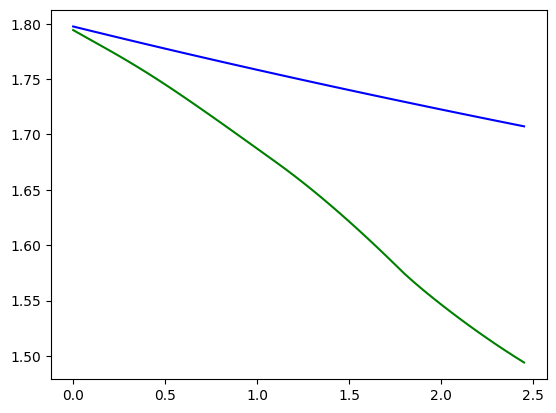

In [36]:
# Number of future time steps to predict
num_steps = 50 # Adjust as needed
all_predictions = []


# Make predictions for the next 'num_steps' time steps sequentially
current_input = X_scaled[200]  # Start with the first test data point


for step in range(num_steps):
    # Predict the next time step
    predicted_values = model.predict(np.array([current_input]))

    # Append the predicted values to the results
    all_predictions.append(predicted_values[0])

    # Update the current input for the next prediction
    current_input = np.concatenate((predicted_values))

predicted_output = np.array((all_predictions))


# print(predicted_output)
# # # Optionally, you can save the model for future use
# # model.save('/content/gdrive/MyDrive/Colab Notebooks/my_model.h5')

actual_values = X_scaled[201:201+num_steps,4]
predicted_values = predicted_output[:,4]
time = np.arange(0,(num_steps)*0.05,0.05)


print(actual_values)
print(predicted_values)
print(len(time))

plt.plot(time,actual_values,c = 'b')
plt.plot(time, predicted_values, c = 'g')
plt.show()

1/1 [==============================] - 0s 30ms/step


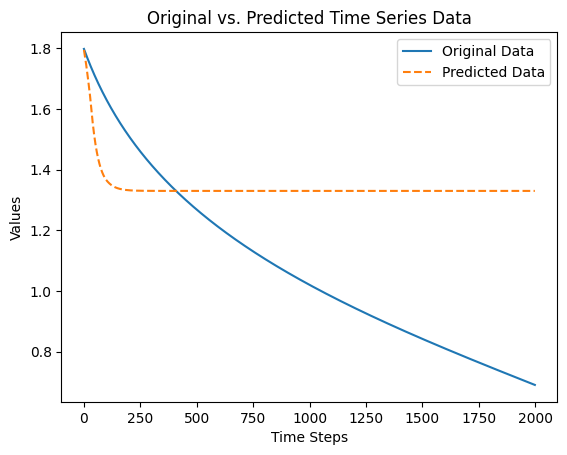

In [41]:
# Number of future time steps to predict
num_steps = 2000 # Adjust as needed
all_predictions = []

# Make predictions for the next 'num_steps' time steps sequentially
current_input = X_scaled[200]  # Start with the last num_steps data points

# print(current_input)

for step in range(num_steps):
    # Predict the next time step
    predicted_values = model.predict(np.array([current_input]))

    # Append the predicted values to the results
    all_predictions.append(predicted_values[0])

    # Update the current input for the next prediction
    current_input = np.concatenate((predicted_values))

predicted_output = np.array(all_predictions)

# print(predicted_output)

# Extract the actual values for all columns
actual_values = X_scaled[201:200+num_steps+1,4]  # Assuming you want to plot column, adjust as needed

# Extract the predicted values for the specified column (column 2)
predicted_values = predicted_output[:, 4]

# Create a time index for plotting
time = np.arange(len(actual_values))

# Plot the original and predicted data
plt.plot(time, actual_values, label='Original Data', linestyle='-')
plt.plot(time, predicted_values, label='Predicted Data', linestyle='--')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.title('Original vs. Predicted Time Series Data')
plt.show()